In [92]:
import main
import re
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [93]:
from scripts import scripts_box

nlp = spacy.load("pl_core_news_lg")
nlp.add_pipe('spacytextblob')

file1 = open("data_facebook/facebook_chlopaki_data.txt", "r", encoding="utf-8")
text1 = file1.read()

file2 = open("data_facebook/facebook_test.txt", "r", encoding="utf-8")
text2 = file2.read()

file3 = open("data_facebook/facebook_chlopaki_zwiazek.txt", "r", encoding="utf-8")
text3 = file3.read()

file4 = open("data_facebook/chlopaki2.txt", "r", encoding="utf-8")
text4 = file4.read()

file5 = open("data_facebook/chlopaki3.txt", "r", encoding="utf-8")
text5 = file5.read()

found1 = re.findall(r'<div class="kvgmc6g5 cxmmr5t8 oygrvhab hcukyx3x c1et5uql ii04i59q">(.*?)</div></div></span>|label="Lubię to!:(.*?)class|label="Super:(.*?)class|label="Trzymaj się:(.*?)class|label="Ha ha:(.*?)class|label="Wow:(.*?)class|label="Przykro mi:(.*?)class|label="Wrr:(.*?)class|<span class="pcp91wgn">(.*?)</span>|fe6kdd0r mau55g9w c8b282yb d3f4x2em iv3no6db jq4qci2q a3bd9o3v b1v8xokw m9osqain" dir="auto">(.*?)</span>', text1)
# for line in found:
#     print(line)

found2 = re.findall(r'<div class="kvgmc6g5 cxmmr5t8 oygrvhab hcukyx3x c1et5uql ii04i59q">(.*?)</div></div></span>|label="Lubię to!:(.*?)class|label="Super:(.*?)class|label="Trzymaj się:(.*?)class|label="Ha ha:(.*?)class|label="Wow:(.*?)class|label="Przykro mi:(.*?)class|label="Wrr:(.*?)class|<span class="pcp91wgn">(.*?)</span>|fe6kdd0r mau55g9w c8b282yb d3f4x2em iv3no6db jq4qci2q a3bd9o3v b1v8xokw m9osqain" dir="auto">(.*?)</span>', text2)

found3 = re.findall(r'<div class="kvgmc6g5 cxmmr5t8 oygrvhab hcukyx3x c1et5uql ii04i59q">(.*?)</div></div></span>|label="Lubię to!:(.*?)class|label="Super:(.*?)class|label="Trzymaj się:(.*?)class|label="Ha ha:(.*?)class|label="Wow:(.*?)class|label="Przykro mi:(.*?)class|label="Wrr:(.*?)class|<span class="pcp91wgn">(.*?)</span>|fe6kdd0r mau55g9w c8b282yb d3f4x2em iv3no6db jq4qci2q a3bd9o3v b1v8xokw m9osqain" dir="auto">(.*?)</span>', text3)

found4 = re.findall(r'<div class="kvgmc6g5 cxmmr5t8 oygrvhab hcukyx3x c1et5uql ii04i59q">(.*?)</div></div></span>|label="Lubię to!:(.*?)class|label="Super:(.*?)class|label="Trzymaj się:(.*?)class|label="Ha ha:(.*?)class|label="Wow:(.*?)class|label="Przykro mi:(.*?)class|label="Wrr:(.*?)class|<span class="pcp91wgn">(.*?)</span>|fe6kdd0r mau55g9w c8b282yb d3f4x2em iv3no6db jq4qci2q a3bd9o3v b1v8xokw m9osqain" dir="auto">(.*?)</span>', text4)

found5 = re.findall(r'<div class="kvgmc6g5 cxmmr5t8 oygrvhab hcukyx3x c1et5uql ii04i59q">(.*?)</div></div></span>|label="Lubię to!:(.*?)class|label="Super:(.*?)class|label="Trzymaj się:(.*?)class|label="Ha ha:(.*?)class|label="Wow:(.*?)class|label="Przykro mi:(.*?)class|label="Wrr:(.*?)class|<span class="pcp91wgn">(.*?)</span>|fe6kdd0r mau55g9w c8b282yb d3f4x2em iv3no6db jq4qci2q a3bd9o3v b1v8xokw m9osqain" dir="auto">(.*?)</span>', text5)

found = found1 + found2 + found3 + found4 + found5

list_posts = []
list_lubie_to = []
list_super = []
list_trzymaj_sie = []
list_haha = []
list_wow = []
list_przykro_mi = []
list_wrr = []
list_all_reactions = []
list_comments = []

whole_list = []
for i in range(len(found)):
    if found[i][0] != '':
        post = scripts_box.clean_post(found[i][0])
        lubie_to = '0'
        superr = '0'
        trzymaj_sie = '0'
        haha = '0'
        wow = '0'
        przykro_mi = '0'
        wrr = '0'
        all_reactions = '0'
        comments = '0'
        j = 1
        while comments == '0':
            this_row = found[i + j]
            if this_row[1] != '':
                lubie_to = this_row[1]
            elif this_row[2] != '':
                superr = this_row[2]
            elif this_row[3] != '':
                trzymaj_sie = this_row[3]
            elif this_row[4] != '':
                haha = this_row[4]
            elif this_row[5] != '':
                wow = this_row[5]
            elif this_row[6] != '':
                przykro_mi = this_row[6]
            elif this_row[7] != '':
                wrr = this_row[7]
            elif this_row[8] != '':
                all_reactions = this_row[8]
            elif this_row[9] != '':
                comments = this_row[9]
            j += 1

        list_posts.append(post)
        list_lubie_to.append(scripts_box.clean_string_to_int(lubie_to))
        list_super.append(scripts_box.clean_string_to_int(superr))
        list_trzymaj_sie.append(scripts_box.clean_string_to_int(trzymaj_sie))
        list_haha.append(scripts_box.clean_string_to_int(haha))
        list_wow.append(scripts_box.clean_string_to_int(wow))
        list_przykro_mi.append(scripts_box.clean_string_to_int(przykro_mi))
        list_wrr.append(scripts_box.clean_string_to_int(wrr))
        list_all_reactions.append(scripts_box.clean_string_to_int(all_reactions))
        list_comments.append(scripts_box.clean_string_to_int(comments))


In [94]:
list_preprocessed_posts = []

for post in list_posts:
    doc = nlp(post)

    clean_text = " ".join(token.lemma_ for token in nlp(doc) if token.lemma_.lower() not in nlp.Defaults.stop_words and token.is_alpha)
    list_preprocessed_posts.append(clean_text)

In [95]:
from spacy import Language


list_all_polarity = []

for post in list_posts:
    doc = nlp(post)
    list_all_polarity.append(doc._.polarity)

print(list_all_polarity[10])

list_all_subjectivity = []

for post in list_posts:
    doc = nlp(post)
    list_all_subjectivity.append(doc._.subjectivity)

print(list_all_polarity[10])

0.0
0.0


In [96]:
list_all_similarity_to_best = []

max_reactions = 0
best_index = 0
for i in range(len(list_all_reactions)):
    if list_all_reactions[i] > max_reactions:
        max_reactions = list_all_reactions[i]
        best_index = i

print(list_posts[best_index])

most_popular_post_doc = nlp(list_posts[i])

for post in list_posts:
    doc = nlp(post)
    list_all_similarity_to_best.append(doc.similarity(most_popular_post_doc))

print(list_all_similarity_to_best[10])

 Wiecie co? Nie ma to jak usłyszeć od laski że popełniła błąd, a mogła być szczęśliwa, usłyszeć po 5 latach związku po 2msc po urodzinach córki. Usłyszeć po tym jak wybaczyłem wpadkę na studnoiwce kiedy byłem za granicą(niby typ się poczuł sytuacja nie jasna) wybaczeniu że nie mogła się rozstać z przyjacielem co chcial z nią być, wybaczeniu(to jest hit) że poszła pijana po imprezie firmowej do kierownika pić wódę a ten się dobierał.. Ktoś określi jakim kretynem jestem? Jak można tak się samemu ubiczować a teraz czuć żal? Bo przed sobą mi wstyd że wogóle mi przykro, jestem rozjebany emocjonalnie przyda się dobry psycholog w lubelskim
0.8785702858366498


In [97]:
list_all_sentiment = []

for i in range(len(list_posts)):
    if list_all_reactions[i] != 0:
        sad_factor = 1 - (int(list_przykro_mi[i]) + int(list_trzymaj_sie[i])) / int(list_all_reactions[i])
        sentiment = (sad_factor - 0.5) * 2
        list_all_sentiment.append(abs(sentiment))
    else:
        list_all_sentiment.append(0)


In [98]:
list_post_length = []
for post in list_posts:
    doc = nlp(post)
    list_post_length.append(len(doc))

# print(list_post_length)

list_more_than_20_reacts = []
list_more_than_50_reacts = []
list_more_than_100_reacts = []
list_more_than_200_reacts = []

for reacts in list_all_reactions:
    if reacts > 20:
        list_more_than_20_reacts.append(1)
    else:
        list_more_than_20_reacts.append(0)

for reacts in list_all_reactions:
    if reacts > 50:
        list_more_than_50_reacts.append(1)
    else:
        list_more_than_50_reacts.append(0)


for reacts in list_all_reactions:
    if reacts > 100:
        list_more_than_100_reacts.append(1)
    else:
        list_more_than_100_reacts.append(0)


for reacts in list_all_reactions:
    if reacts > 200:
        list_more_than_200_reacts.append(1)
    else:
        list_more_than_200_reacts.append(0)



In [99]:
#TRAIN BAYES 200 REACTIONS
vec = CountVectorizer()

x20 = list_preprocessed_posts
y20 = list_more_than_200_reacts

x20, x_test20, y20, y_test20 = train_test_split(x20, y20, stratify=y20, test_size=0.25, random_state=42)

x20 = vec.fit_transform(x20).toarray()
x_test20 = vec.transform(x_test20).toarray()

model20 = MultinomialNB()

model20.fit(x20, y20)

print(model20.score(x_test20, y_test20))

list_more_than_20_reacts_bayes = model20.predict(vec.transform(list_posts))

#TRAIN BAYES 50 REACTIONS

x50 = list_preprocessed_posts
y50 = list_more_than_50_reacts

x50, x_test50, y50, y_test50 = train_test_split(x50, y50, stratify=y50, test_size=0.25, random_state=42)

x50 = vec.fit_transform(x50).toarray()
x_test50 = vec.transform(x_test50).toarray()

model50 = MultinomialNB()
model50.fit(x50, y50)

print(model50.score(x_test50, y_test50))

list_more_than_50_reacts_bayes = model50.predict(vec.transform(list_posts))

#TRAIN BAYES 100 REACTIONS

x100 = list_preprocessed_posts
y100 = list_more_than_100_reacts

x100, x_test100, y100, y_test100 = train_test_split(x100, y100, stratify=y100, test_size=0.25, random_state=42)

x100 = vec.fit_transform(x100).toarray()
x_test100 = vec.transform(x_test100).toarray()

model100 = MultinomialNB()
model100.fit(x100, y100)

print(model100.score(x_test100, y_test100))

list_more_than_100_reacts_bayes = model100.predict(vec.transform(list_posts))

#TRAIN BAYES 200 REACTIONS

x200 = list_preprocessed_posts
y200 = list_more_than_200_reacts

x200, x_test200, y200, y_test200 = train_test_split(x200, y200, stratify=y200, test_size=0.25, random_state=42)

x200 = vec.fit_transform(x200).toarray()
x_test200 = vec.transform(x_test200).toarray()

model200 = MultinomialNB()

model200.fit(x200, y200)

print(model200.score(x_test200, y_test200))

list_more_than_200_reacts_bayes = model200.predict(vec.transform(list_posts))

0.9703703703703703
0.8296296296296296
0.8518518518518519
0.9703703703703703


Text(0, 0.5, 'Liczba postów')

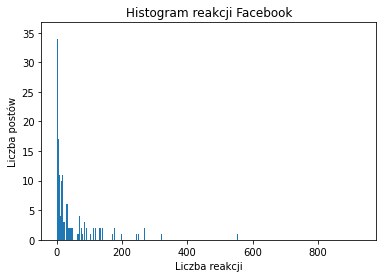

In [100]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'POSTS' : list_posts,
    'PREPROCESSED_POSTS' : list_preprocessed_posts,
    'LUBIE_TO' : list_lubie_to,
    'SUPER' : list_super,
    'TRZYMAJ_SIE' : list_trzymaj_sie,
    'HAHA' : list_haha,
    'WOW' : list_wow,
    'PRZYKRO_MI' : list_przykro_mi,
    'WRR' : list_wrr,
    'ALL_REACTIONS' : list_all_reactions,
    'COMMENTS' : list_comments,
    'POLARITY' : list_all_polarity,
    'SUBJECTIVITY' : list_all_subjectivity,
    'SIMILARITY_TO_BEST' : list_all_similarity_to_best,
    'POSTS_LENGTH' : list_post_length,
    'POSTS_SENTIMENT' : list_all_sentiment,
    'TWENTY_REACTS_BAYES': list_more_than_20_reacts_bayes,
    'FIFTY_REACTS_BAYES': list_more_than_50_reacts_bayes,
    'HUNDRED_REACTS_BAYES': list_more_than_100_reacts_bayes,
    'TWO_HUNDRED_REACTS_BAYES': list_more_than_200_reacts_bayes
}

df_facebook = pd.DataFrame(data)

# print(df_facebook)
df_facebook.to_csv('data_facebook/facebook_data.csv')

hist_list = []
for reactions in list_all_reactions:
    hist_list.append(reactions)


fig = plt.figure()
plt.hist(hist_list, 1000)
plt.title('Histogram reakcji Facebook')
plt.xlabel('Liczba reakcji')
plt.ylabel('Liczba postów')
# plt.plot(list_all_sentiment, list_all_reactions, 'b.')
# plt.show()

Text(0, 0.5, 'Liczba postów')

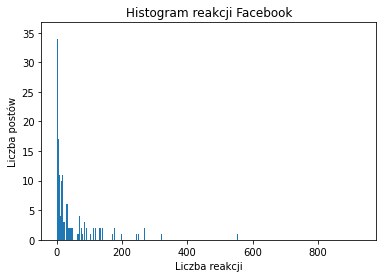

In [101]:
hist_list = []
for reactions in list_all_reactions:
    hist_list.append(reactions)


fig = plt.figure()
plt.hist(hist_list, 1000)
plt.title('Histogram reakcji Facebook')
plt.xlabel('Liczba reakcji')
plt.ylabel('Liczba postów')

     Intercept  POLARITY  SUBJECTIVITY  POSTS_LENGTH  SIMILARITY_TO_BEST  \
2          1.0       0.0         0.000          33.0            0.802757   
3          1.0       0.0         0.000          92.0            0.905727   
4          1.0       0.0         0.000          22.0            0.580254   
7          1.0       0.0         0.125          21.0            0.813336   
12         1.0       0.0         0.000          49.0            0.852278   
..         ...       ...           ...           ...                 ...   
525        1.0       0.0         0.000          34.0            0.903517   
532        1.0       0.0         0.000         104.0            0.907979   
533        1.0       0.0         0.000          62.0            0.870139   
534        1.0       0.7         0.600          43.0            0.884433   
538        1.0       0.0         0.000          69.0            1.000000   

     TWENTY_REACTS_BAYES  FIFTY_REACTS_BAYES  HUNDRED_REACTS_BAYES  \
2                

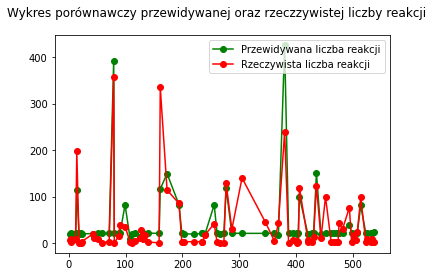

                 Generalized Linear Model Regression Results                  
Dep. Variable:          ALL_REACTIONS   No. Observations:                  459
Model:                            GLM   Df Residuals:                      451
Model Family:                 Poisson   Df Model:                            7
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9195.9
Date:                Sat, 08 Jan 2022   Deviance:                       16354.
Time:                        20:32:57   Pearson chi2:                 2.85e+04
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

<Figure size 432x288 with 0 Axes>

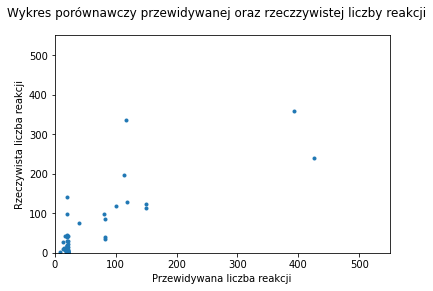

[[1.         0.81548747]
 [0.81548747 1.        ]]
29.161954084020106


ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1e-08, but the percent differences are:
0.19334359233153292

In [102]:
from sklearn.metrics import mean_poisson_deviance
from statsmodels.formula.api import glm
import pandas as pd
from patsy import dmatrices
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

df_facebook = pd.read_csv('data_facebook/facebook_data.csv')

mask = np.random.rand(len(df_facebook)) < 0.85
df_train = df_facebook[mask]
df_test = df_facebook[~mask]

expr = """ALL_REACTIONS ~ POLARITY + SUBJECTIVITY + POSTS_LENGTH + SIMILARITY_TO_BEST + TWENTY_REACTS_BAYES + FIFTY_REACTS_BAYES + HUNDRED_REACTS_BAYES + TWO_HUNDRED_REACTS_BAYES"""

y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')
print(X_test)

poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

poisson_predictions = poisson_training_results.get_prediction(X_test)
predictions_summary_frame = poisson_predictions.summary_frame()

predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['ALL_REACTIONS']
fig = plt.figure()
fig.suptitle('Wykres porównawczy przewidywanej oraz rzeczzywistej liczby reakcji')
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Przewidywana liczba reakcji')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Rzeczywista liczba reakcji')
plt.legend(handles=[predicted, actual])
plt.show()

#Print the training summary.
print(poisson_training_results.summary())
print(mean_poisson_deviance(actual_counts, predicted_counts))

from scipy.stats import chisquare

plt.clf()
fig = plt.figure()
fig.suptitle('Wykres porównawczy przewidywanej oraz rzeczzywistej liczby reakcji')
plt.scatter(x=predicted_counts, y=actual_counts, marker='.')
plt.xlim([0, 550])
plt.ylim([0, 550])
plt.xlabel('Przewidywana liczba reakcji')
plt.ylabel('Rzeczywista liczba reakcji')
plt.show()

print(np.corrcoef(predicted_counts, actual_counts))
print(mean_poisson_deviance(actual_counts, predicted_counts))
print(chisquare(predicted_counts, f_exp=actual_counts))

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(poisson_training_results, predicted_counts, actual_counts, cv=5)

In [ ]:
i = 0
max_corr = 0.4
min_poisson_deviance = 100

final_predicted = []
final_actual = []

for i in range(1000):
    i += 1

    mask = np.random.rand(len(df_facebook)) < 0.85
    df_train = df_facebook[mask]
    df_test = df_facebook[~mask]
    # print('Training data set length='+str(len(df_train)))
    # print('Testing data set length='+str(len(df_test)))

    expr = """ALL_REACTIONS ~ POLARITY + SUBJECTIVITY + POSTS_LENGTH + POSTS_SENTIMENT + SIMILARITY_TO_BEST + TWENTY_REACTS_BAYES + FIFTY_REACTS_BAYES + HUNDRED_REACTS_BAYES + TWO_HUNDRED_REACTS_BAYES"""

    y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
    y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

    poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

    poisson_predictions = poisson_training_results.get_prediction(X_test)
    #summary_frame() returns a pandas DataFrame
    predictions_summary_frame = poisson_predictions.summary_frame()
    #print(predictions_summary_frame)

    predicted_counts=predictions_summary_frame['mean']
    actual_counts = y_test['ALL_REACTIONS']

    if np.corrcoef(actual_counts, predicted_counts)[0][1] > max_corr:

        max_corr = np.corrcoef(actual_counts, predicted_counts)[0][1]
        # print(str(min_poisson_deviance))
        print(np.corrcoef(actual_counts, predicted_counts)[0][1])
        final_predicted = predicted_counts
        final_actual = actual_counts

        fig = plt.figure()
        fig.suptitle('Wykres porównawczy przewidywanej oraz rzeczywistej liczby reakcji')
        predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Przewidywana liczba reakcji')
        actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Rzeczywista liczba reakcji')
        plt.legend(handles=[predicted, actual])
        plt.show()

        #Print the training summary.
        print(poisson_training_results.summary())
        # print(chisquare(predicted_counts, f_exp=actual_counts))

        plt.clf()
        fig = plt.figure()
        fig.suptitle('Wykres porównawczy przewidywanej oraz rzeczywistej liczby reakcji')
        plt.scatter(x=predicted_counts, y=actual_counts, marker='.')
        plt.xlim([0, 550])
        plt.ylim([0, 550])
        plt.xlabel('Przewidywana liczba reakcji')
        plt.ylabel('Rzeczywista liczba reakcji')
        plt.show()

In [ ]:
from scipy.stats import chisquare
print(chisquare(final_predicted, f_exp=actual_counts))